In [4]:
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def true_func(x): 
    return np.exp(-x) * np.sin(2 * np.pi * x)
X = np.sort(np.random.uniform(0, 2, 50))
y =  true_func(X) + np.random.normal(0, 0.1, 50)

In [78]:
def get_neighbors(data, x, delta): 
    return np.abs(data - x) < delta

def kernel_mean(neighbor_X, x): 
    return np.array([(1/len(neighbor_X)) for _ in range(len(neighbor_X))])

def kernel_boxcar(neighbor_X, x, h): 
    input = np.abs(neighbor_X - x) / h
    return np.array([1 for _ in range(len(neighbor_X))]) * (input < 1/2) 

def kernel_gaussian(neighbor_X, x, h): 
    return np.exp(-(np.abs(neighbor_X - x) ** 2)/h)

def kernel_epanechnikov(neighbor_X, x, h): 
    input = np.abs(neighbor_X - x) / h
    return (3/4) * (1 - input ** 2) * (input < 1)

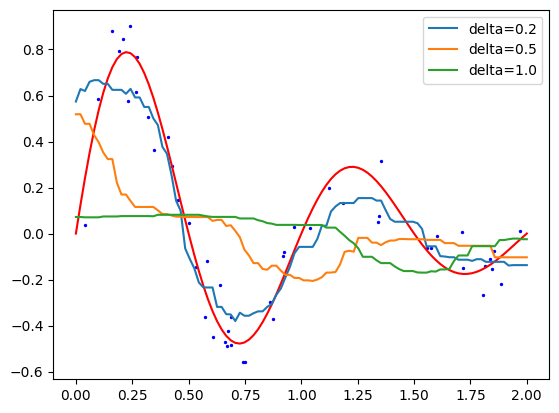

In [72]:
plt.scatter(X, y, c="b", s=2) 
plt.plot(np.linspace(0, 2, 100), true_func(np.linspace(0, 2, 100)), c="r")

for delta in [0.2, 0.5, 1.0]: 
    x_space = np.linspace(0, 2, 100) 
    y_space = []
    for x in x_space: 
        neighbor_indices = get_neighbors(X, x, delta)
        neighbor_X = X[neighbor_indices]
        neighbor_y = y[neighbor_indices]
        kernel_weights = kernel_mean(neighbor_X, x) 
        y_space.append(np.dot(kernel_weights, neighbor_y))
    
    plt.plot(x_space, y_space, label=f"delta={delta}") 
plt.legend()  
plt.show() 

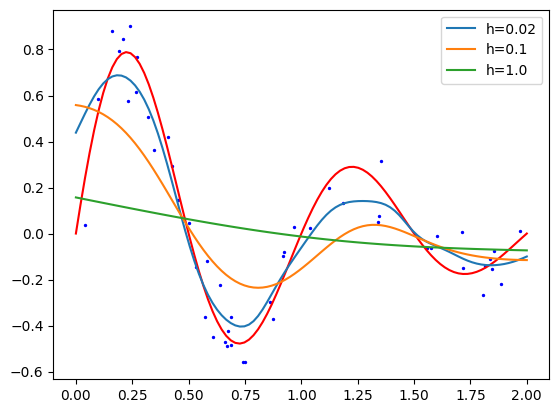

In [73]:
plt.scatter(X, y, c="b", s=2) 
plt.plot(np.linspace(0, 2, 100), true_func(np.linspace(0, 2, 100)), c="r")

for h in [0.02, 0.1, 1.0]: 
    x_space = np.linspace(0, 2, 100) 
    y_space = []
    for x in x_space: 
        neighbor_X = X
        neighbor_y = y
        kernel_weights = kernel_gaussian(neighbor_X, x, h) / np.sum(kernel_gaussian(neighbor_X, x, h))
        y_space.append(np.dot(kernel_weights, neighbor_y))
    
    plt.plot(x_space, y_space, label=f"h={h}") 
plt.legend()  
plt.show() 

/var/folders/35/0hvkp3v523zbpr_gk85ssrc80000gn/T/ipykernel_17707/971692828.py:10: RuntimeWarning: invalid value encountered in divide
  kernel_weights = kernel_boxcar(neighbor_X, x, h) / np.sum(kernel_boxcar(neighbor_X, x, h))


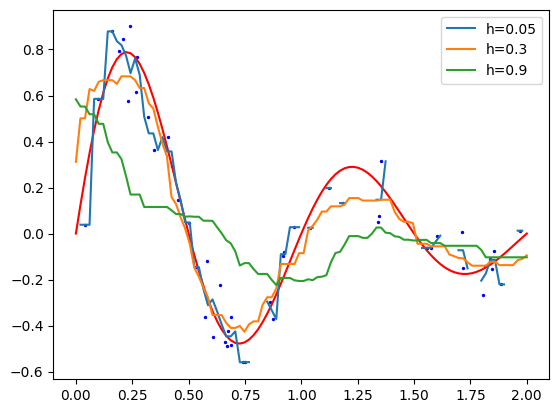

In [79]:
plt.scatter(X, y, c="b", s=2) 
plt.plot(np.linspace(0, 2, 100), true_func(np.linspace(0, 2, 100)), c="r")

for h in [0.05, 0.3, 0.9]: 
    x_space = np.linspace(0, 2, 100) 
    y_space = []
    for x in x_space: 
        neighbor_X = X
        neighbor_y = y
        kernel_weights = kernel_boxcar(neighbor_X, x, h) / np.sum(kernel_boxcar(neighbor_X, x, h))
        y_space.append(np.dot(kernel_weights, neighbor_y))
    
    plt.plot(x_space, y_space, label=f"h={h}") 
plt.legend()  
plt.show() 


/var/folders/35/0hvkp3v523zbpr_gk85ssrc80000gn/T/ipykernel_17707/3129071185.py:10: RuntimeWarning: invalid value encountered in divide
  kernel_weights = kernel_epanechnikov(neighbor_X, x, h) / np.sum(kernel_epanechnikov(neighbor_X, x, h))


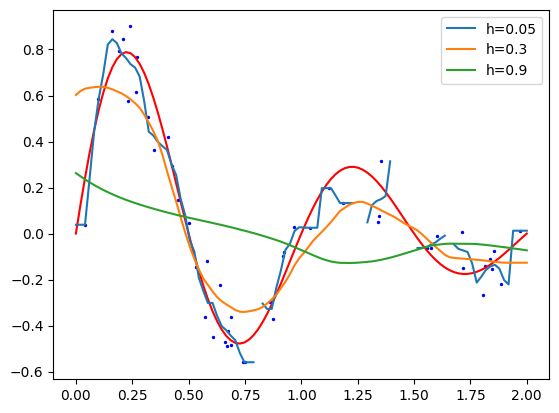

In [77]:
plt.scatter(X, y, c="b", s=2) 
plt.plot(np.linspace(0, 2, 100), true_func(np.linspace(0, 2, 100)), c="r")

for h in [0.05, 0.3, 0.9]: 
    x_space = np.linspace(0, 2, 100) 
    y_space = []
    for x in x_space: 
        neighbor_X = X
        neighbor_y = y
        kernel_weights = kernel_epanechnikov(neighbor_X, x, h) / np.sum(kernel_epanechnikov(neighbor_X, x, h))
        y_space.append(np.dot(kernel_weights, neighbor_y))
    
    plt.plot(x_space, y_space, label=f"h={h}") 
plt.legend()  
plt.show() 